## Title of Project : Exploratory analysis by using Linear Regressions on the houses prices in selected areas in USA data set
## Dataset Source : https://www.kaggle.com/ialjadani/houses-prices-in-selected-area-in-usa

In [4]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
pd.set_option("max_rows", None)

## Importing and Drop some features no need for the regression process


In [5]:
import pandas as pd
import numpy as np
df=pd.read_csv("houses_dataset.csv")
df=df.drop(["Currency","Unnamed: 0","Measruing unit"],axis=1)
df.head(5)

,Price,Brokered_by,AD_Situation,Rooms,Bath,Building space,Address,City,State
0,289900,Greene Realty Group LLC,New - 7 hours ago,3,2.0,1944,"5142 Puget Rd NE, Olympia, WA 98516",Olympia,WA 98516
1,150000,Jet Real Estate,New,2,2.0,1200,"15718 Ordway Dr SE, Yelm, WA 98597",Yelm,WA 98597
2,199500,Windermere Real Estate Yelm,New - 7 hours ago,3,2.0,1012,"17020 Wisteria Cir SE, Yelm, WA 98597",Yelm,WA 98597
3,419900,John L. Scott - Olympia,New - 7 hours ago,3,1.5,1986,"14148 Tilley Rd S, Tenino, WA 98589",Tenino,WA 98589
4,146999,Adair Homes,Old,3,2.0,1340,"South Puget Sound 2303 93rd Ave SW, Olympia, WA 98512",Olympia,WA 98512


## Description of Dataset

In [6]:
df.describe()

,Price,Rooms,Bath,Building space
count,1.718000e+03,1718.000000,1718.000000,1718.000000
mean,6.243967e+05,3.291036,2.326542,2026.519208
std,4.687882e+05,1.040945,0.856069,951.392533
min,2.000000e+04,1.000000,0.500000,454.000000
25%,3.606250e+05,3.000000,2.000000,1360.250000
50%,4.849995e+05,3.000000,2.000000,1860.000000
75%,7.355745e+05,4.000000,2.500000,2493.000000
max,4.600000e+06,13.000000,10.000000,12873.000000


## Show the correlation between the explanotary features and response feature

Depending on the result of correlation matrix we found the Feature Building space is the most correlated wit the Price Feature so our independent variable will be the Building space Feature

In [7]:
df.corr()

,Price,Rooms,Bath,Building space
Price,1.000000,0.346652,0.556632,0.608510
Rooms,0.346652,1.000000,0.649800,0.656164
Bath,0.556632,0.649800,1.000000,0.726385
Building space,0.608510,0.656164,0.726385,1.000000


## Distrubution of Features

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Bath'}>,
        <AxesSubplot:title={'center':'Building space'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

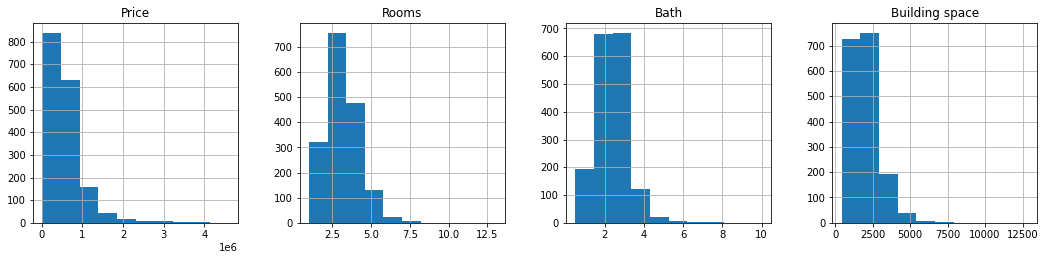

In [8]:
hist=df.hist(figsize=(18,18),layout=(4,4))
hist

## Select the explanotary features and response feature

In [9]:
X=df[["Rooms","Bath","Building space"]]
Y=df["Price"]

In [10]:
print("The independent features")
X.head(5)


The independent features


,Rooms,Bath,Building space
0,3,2.0,1944
1,2,2.0,1200
2,3,2.0,1012
3,3,1.5,1986
4,3,2.0,1340


In [11]:
print("The dependent fature")
Y.head(5)

The dependent fature


0    289900
1    150000
2    199500
3    419900
4    146999
Name: Price, dtype: int64

## Explanotary feature preprocessing

In [12]:
X=X["Building space"]
X=np.array(X).reshape(1718,1)
# from sklearn import preprocessing

# scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
# feature = scale.fit_transform(X)

# scale = preprocessing.StandardScaler() 
# standard = scale.fit_transform(feature)

# print(standard)

print(X)

[[1944]
 [1200]
 [1012]
 ...
 [ 731]
 [1962]
 [3069]]


In [13]:
Y=np.array(Y)
print(Y)

[289900 150000 199500 ... 399000 744900 819950]


## Split the Data

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.30, random_state=1)


## Fit the Model

In [15]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

## Predict 

In [16]:
y_predict=model.predict(x_test)

In [17]:
y_predict[0:10]

array([264028.60798953, 593756.96850005, 616579.69654996, 539402.83985487,
       401565.57439556, 903665.59149354, 750513.07431652, 587750.98743428,
       812674.97834719, 600363.54767239])

In [18]:
y_test[0:10]

array([ 289999,  589900, 1495000,  419990,  385000,  789999,  425000,
        334900,  789000,  190499])

## Plot The Testing Data


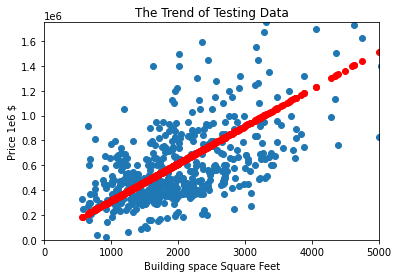

In [28]:
import matplotlib.pyplot as plt
plt.title("The Trend of Testing Data")
plt.ylabel("Price 1e6 $")
plt.xlabel("Building space Square Feet")
plt.xlim(0, 5000)
plt.ylim(0, 1.75*10**6)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,'ro')

## Plot the predicted Data

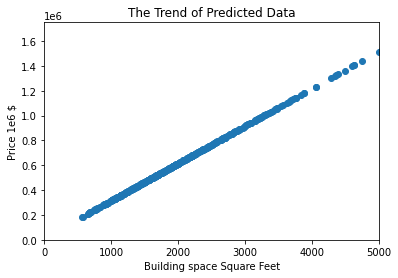

In [20]:
plt.title("The Trend of Predicted Data")
plt.ylabel("Price 1e6 $")
plt.xlabel("Building space Square Feet")
plt.xlim(0, 5000)
plt.ylim(0, 1.75*10**6)
plt.scatter(x_test,y_predict)

## Evaluation of Model

In [21]:
training_accurecy = round(model.score(x_train,y_train),3)
print(f"Tranning Accurecy: {training_accurecy}")

Tranning Accurecy: 0.37


In [22]:
testing_accurecy = round(model.score(x_test,y_test),3)
print(f"Testing Accurecy: {testing_accurecy}")

Testing Accurecy: 0.371


In [23]:
predicting_accurecy = round(model.score(x_test,y_predict),3)
print(f"Predicting Accurecy: {predicting_accurecy}")

Predicting Accurecy: 1.0


In [24]:
from sklearn.metrics import r2_score
R2=round(r2_score(y_test, y_predict),3)
print(f"R^2 :{R2}")

R^2 :0.371


In [25]:
mae=mean_absolute_error(y_test, y_predict)
print(f"Mean Absoulte Error: {mae}")

NameError: name 'mean_absolute_error' is not defined

In [ ]:
mse=np.sqrt(mean_squared_error(y_test, y_predict))
print(f"Mean Squared Error: {mse}")

## Concolusion

1. There is no None values in the dataset
2. The most correlated feature is Building space
3. The dataset need more processing to improve the accurecy and the result of r^2 is near to be optimal